# 케라스의 모델 설계 방식
---
1. Sequential API
2. Functional API 
3. Subclassing API

### 필요한 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비
**Fashion-MNIST 데이터셋**<br>
- https://github.com/zalandoresearch/fashion-mnist

**이미지 데이터**<br>
- 컬러 이미지: 28, 28, 3
- 흑백 이미지: 28, 28, 1

[데이터셋 Modules](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)
- `boston_housing`, `cifar10`, `cifar100`, `fashion_mnist`, `imdb`, `mnist`, `reuters`

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


|Label	|Description|
|:---:|:------:|
|0	|T-shirt/top|
|1	|Trouser|
|2	|Pullover|
|3	|Dress|
|4	|Coat|
|5	|Sandal|
|6	|Shirt|
|7	|Sneaker|
|8	|Bag|
|9	|Ankle boot|

In [3]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

- 시각화

In [4]:
samples = np.random.randint(60000, size=9)
print(samples)

[34186 22129 40241 12470 31782 48386  4830 43033 17158]


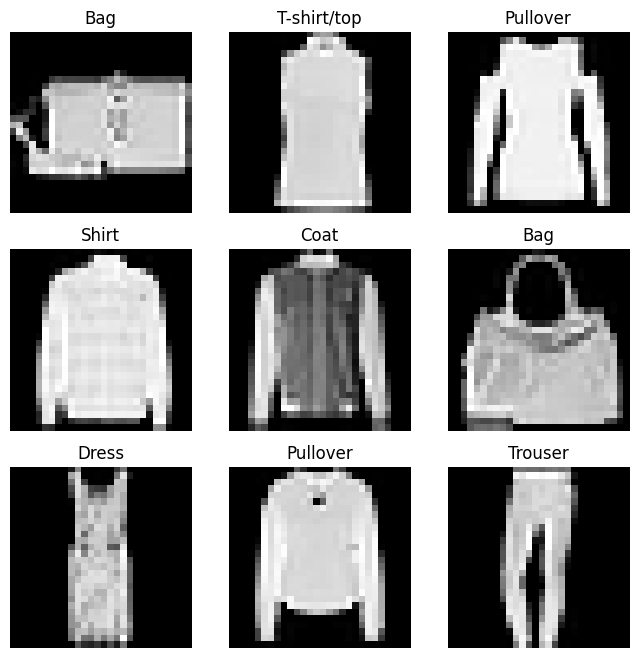

In [5]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
plt.show()

- 데이터 분리: train dataset, validation datset

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.3, random_state=1234)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(42000, 28, 28) (18000, 28, 28)
(42000,) (18000,)


- 정규화: 최대-최소 정규화

In [7]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

- 다중 분류: 원핫인코딩

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [9]:
X_train.shape

(42000, 28, 28)

In [10]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [11]:
X_train.shape

(42000, 28, 28, 1)

### 1. Sequential API로 만든 모델

**1-1. Sequential API**
- Sequential 생성할 때, 레이어를 동시에 지정

In [12]:
def build_model_1():
    model = keras.Sequential([
        layers.Conv2D(filters=32, kernel_size=3, activation='relu', 
                      input_shape=(28, 28, 1)), 
        layers.MaxPool2D(pool_size=(2, 2)), 
        layers.Conv2D(filters=64, kernel_size=3, activation='relu'), 
        layers.MaxPool2D(pool_size=(2, 2)), 
        layers.Flatten(), 
        layers.Dense(units=32, activation='relu'), 
        layers.Dense(units=10, activation='softmax')
    ])

    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['acc']
    )

    return model

In [13]:
model_1 = build_model_1()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [14]:
%%time
EPOCHS = 50
BATCH_SIZE = 32

history = model_1.fit(X_train, y_train_oh, 
                      epochs=EPOCHS, 
                      batch_size=BATCH_SIZE, 
                      validation_data=(X_val, y_val_oh), 
                      verbose=1)

Epoch 1/50
1313/1313 [==============================] - 19s 5ms/step - loss: 0.5342 - acc: 0.8074 - val_loss: 0.3916 - val_acc: 0.8591
Epoch 2/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3548 - acc: 0.8721 - val_loss: 0.3899 - val_acc: 0.8538
Epoch 3/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3079 - acc: 0.8885 - val_loss: 0.3276 - val_acc: 0.8759
Epoch 4/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2735 - acc: 0.9003 - val_loss: 0.2981 - val_acc: 0.8910
Epoch 5/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2475 - acc: 0.9086 - val_loss: 0.2772 - val_acc: 0.8974
Epoch 6/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2243 - acc: 0.9176 - val_loss: 0.2732 - val_acc: 0.8992
Epoch 7/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2035 - acc: 0.9245 - val_loss: 0.2840 - val_acc: 0.8967
Epoch 8/50
1313/1313 [==============================] - 7s 5m

- 학습 과정 시각화

In [15]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
    plt.legend()

    plt.show()

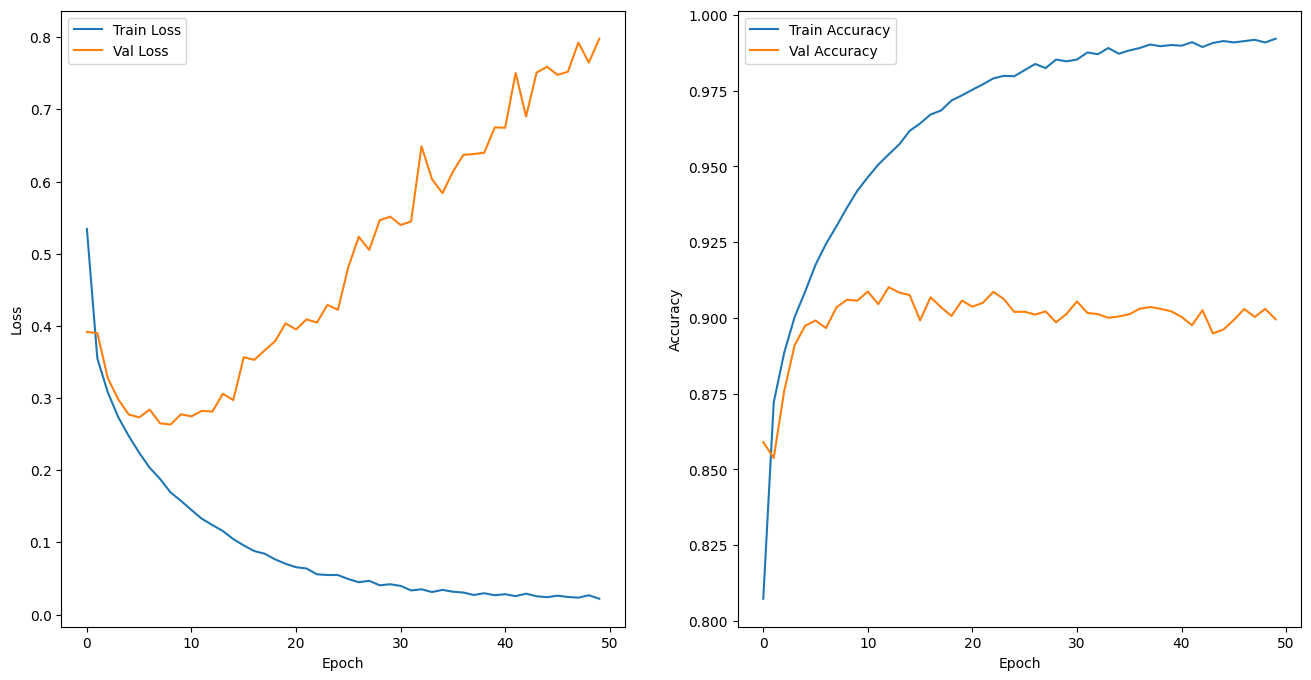

In [16]:
plot_history(history)

- 평가

In [17]:
model_1.evaluate(X_train, y_train_oh)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0322 - acc: 0.9893


[0.032198745757341385, 0.9892619252204895]

In [18]:
model_1.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.8588 - acc: 0.8970


[0.8588186502456665, 0.8970000147819519]

- 예측

In [19]:
y_pred = model_1.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[2.5287028e-25, 3.1480981e-35, 6.3250536e-34, 8.1614760e-25,
        0.0000000e+00, 4.6330416e-17, 3.7980091e-29, 1.1334598e-15,
        9.8080812e-23, 1.0000000e+00],
       [5.9936617e-23, 0.0000000e+00, 1.0000000e+00, 2.9689348e-23,
        3.6686240e-14, 8.7076007e-22, 1.1894096e-17, 3.8337965e-25,
        7.3900708e-30, 3.5247010e-16],
       [1.0178736e-37, 1.0000000e+00, 0.0000000e+00, 4.0449082e-34,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3991730e-26, 1.0000000e+00, 1.7703647e-31, 2.8282756e-26,
        9.9373207e-33, 0.0000000e+00, 9.9868526e-30, 3.5111114e-36,
        2.0449978e-38, 0.0000000e+00],
       [3.4398611e-03, 7.8505031e-24, 4.8472953e-07, 5.3068727e-09,
        1.2954714e-06, 9.3352197e-26, 9.9655837e-01, 1.7927756e-28,
        6.8443756e-25, 9.6113896e-21]], dtype=float32)

In [20]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

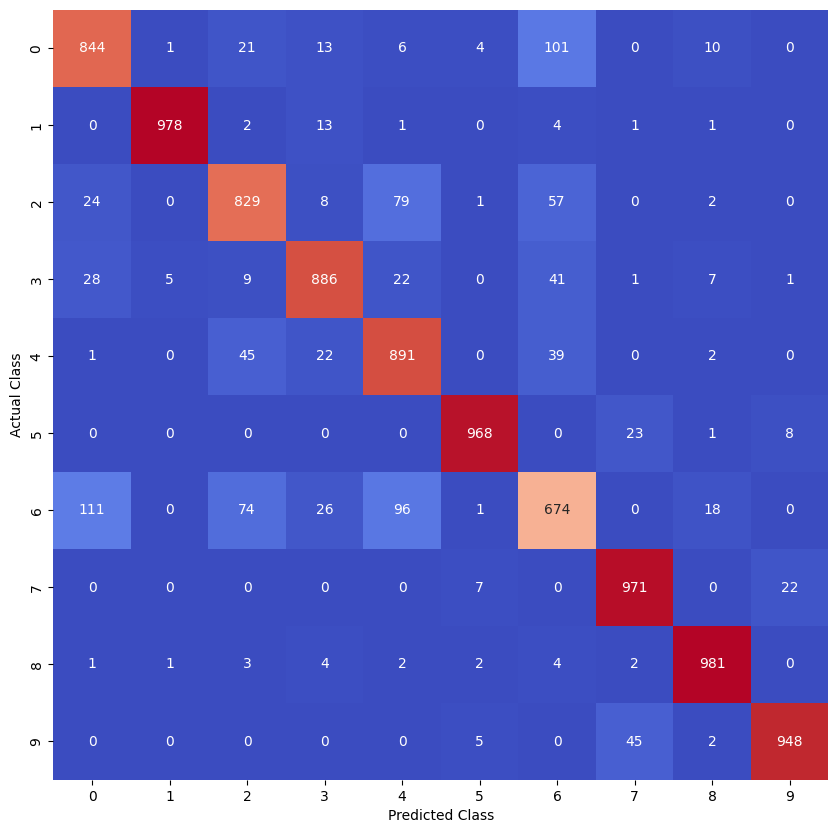

In [21]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cfm, annot=True, cbar=False, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

- 오답 이미지 시각화

In [22]:
samples = np.where((y_test==y_pred) == False)[0]
samples = np.random.choice(samples, 9)
print(samples)

X_test = X_test.reshape(-1, 28, 28)
print(X_test.shape)

[3080 6829 3919 8237 7654 3496 4394 2934 6241]
(10000, 28, 28)


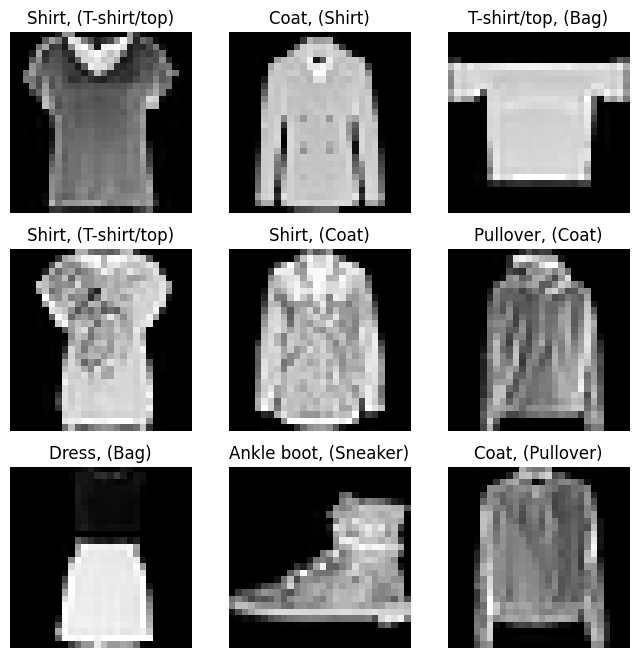

In [23]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f'{class_name[y_test[idx]]}, ({class_name[y_pred[idx]]})')
plt.show()

**1-2. Sequential API**
- Sequential 생성할 때, 레이어를 add로 지정

In [24]:
def build_model_2():
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', 
                            input_shape=(28, 28, 1))), 
    model.add(layers.MaxPool2D(pool_size=(2, 2))), 
    model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu')), 
    model.add(layers.MaxPool2D(pool_size=(2, 2))), 
    model.add(layers.Flatten()), 
    model.add(layers.Dense(units=32, activation='relu')), 
    model.add(layers.Dense(units=10, activation='softmax'))

    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['acc']
    )
    
    return model

In [25]:
model_2 = build_model_2()
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 32)               

### 2. Functional API로 만든 모델
- Sequential API로 만들 수 없는 모델의 경우, Functional API 사용

**2-1. Functional API**
- 입력이 1개인 임의의 모델

In [26]:
from tensorflow.keras.models import Model

In [27]:
def build_model_3():
    inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(units=32, activation='relu')(x)
    outputs = layers.Dense(units=10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['acc']
    )
    
    return model

In [28]:
model_3 = build_model_3()
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0     

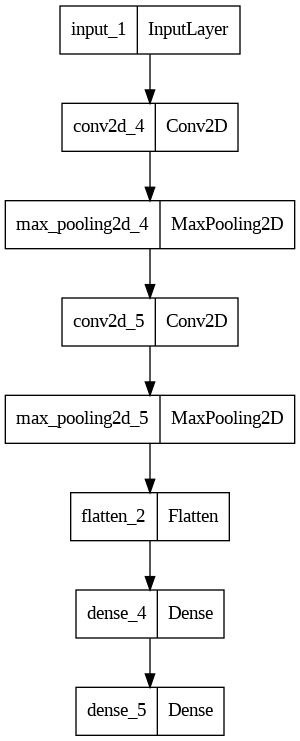

In [29]:
tf.keras.utils.plot_model(model_3)

**2-2. Functional API**
- 입력이 2개인 임의의 모델

In [30]:
def build_model_4():
    inputX = layers.Input(shape=(16,))
    x1 = layers.Dense(8, activation='relu')(inputX)
    x2 = layers.Dense(16, activation='relu')(x1)
    x3 = Model(inputs=inputX, outputs=x2)

    inputY = layers.Input(shape=(16,))
    x4 = layers.Dense(8, activation='relu')(inputY)
    x5 = layers.Dense(16, activation='relu')(x4)
    x6 = Model(inputs=inputY, outputs=x5)

    combined = layers.concatenate([x3.output, x6.output])
    z1 = layers.Dense(2, activation='relu')(combined)
    z2 = layers.Dense(1)(z1)

    model = Model(inputs=[x3.input, x6.input], outputs=z2)

    return model

In [31]:
model_4 = build_model_4()
model_4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 8)            136         ['input_2[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 8)            136         ['input_3[0][0]']                
                                                                                            

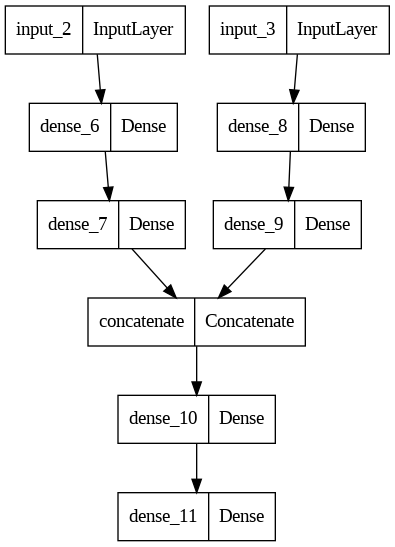

In [32]:
tf.keras.utils.plot_model(model_4)

### 3. Subclassing API로 만든 모델
- 모델을 클래스로 만드는 것

**3-1. Subclassing API**

In [33]:
class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()

        # 레이어 정의
        self.conv1 = layers.Conv2D(32, 3, activation='relu')
        self.conv2 = layers.Conv2D(64, 3, activation='relu')
        self.maxpool = layers.MaxPooling2D(2)
        self.flat = layers.Flatten()
        self.dense1 = layers.Dense(32, activation='relu')
        self.dense2=  layers.Dense(10, activation='softmax')
    
    # 레이어 연결
    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.maxpool(x)
        x = self.flat(x)
        x = self.dense1(x)
        outputs = self.dense2(x)

        return outputs

In [34]:
model_5 = MnistModel()

model_5.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)

In [35]:
%%time
EPOCHS = 50
BATCH_SIZE = 32

history = model_5.fit(X_train, y_train_oh, 
                      epochs=EPOCHS, 
                      batch_size=BATCH_SIZE, 
                      validation_data=(X_val, y_val_oh), 
                      verbose=1)

Epoch 1/50
1313/1313 [==============================] - 11s 7ms/step - loss: 0.4371 - acc: 0.8448 - val_loss: 0.3040 - val_acc: 0.8886
Epoch 2/50
1313/1313 [==============================] - 7s 6ms/step - loss: 0.2780 - acc: 0.9006 - val_loss: 0.2757 - val_acc: 0.8999
Epoch 3/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2241 - acc: 0.9183 - val_loss: 0.2792 - val_acc: 0.8996
Epoch 4/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1918 - acc: 0.9316 - val_loss: 0.2635 - val_acc: 0.9076
Epoch 5/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1584 - acc: 0.9417 - val_loss: 0.2623 - val_acc: 0.9088
Epoch 6/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1315 - acc: 0.9516 - val_loss: 0.2456 - val_acc: 0.9161
Epoch 7/50
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1085 - acc: 0.9603 - val_loss: 0.2783 - val_acc: 0.9162
Epoch 8/50
1313/1313 [==============================] - 7s 5m

- 학습 과정 시각화

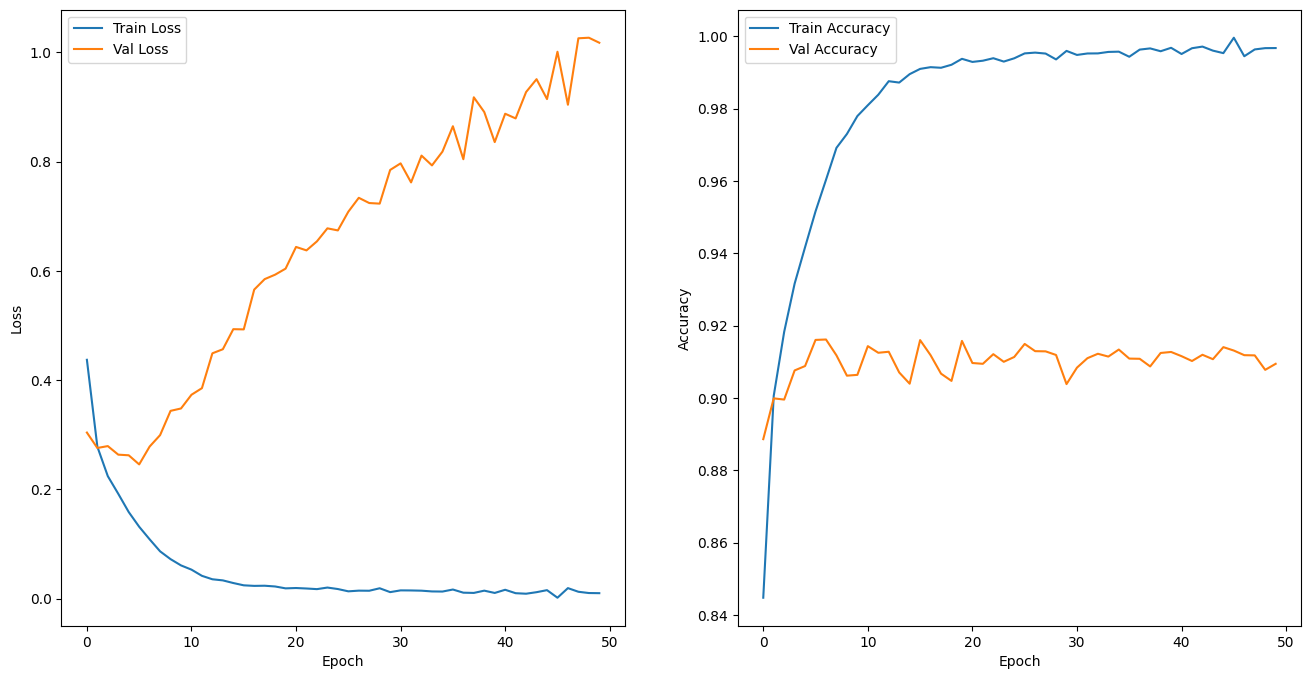

In [36]:
plot_history(history)